In [2]:
from modifier import Modifier
from global_settings import sumovsls

def modifier_sumo(interval_list, modifier_list):
        # Get interval [1.25, 2.75]
        # Get the values from the modifier array for the interval ID,[value,...]
        # Resample traffic volume with different granularity
        interval_ids = [[int(num) for num in interval] for interval in interval_list]
        mlist = []
        for interval in interval_ids:
            ids = []
            volume = []
            print(f"Print interval {interval}")
            # Get traffic volume for each id
            # We assume, constant volume per interval
            start = modifier_list[interval[0]-1][1][0]
            end = modifier_list[interval[1]-1][1][0]
            # Create step for traffic volume
            step = 25
            for value in range(start, end, step):
                volume.append(value)

            ids = Modifier.rescale(volume,interval[0],interval[1])
            print(f"volume {volume}")
            for i in range(0,len(ids)-1):
                mlist.append([ids[i],[volume[i]]*90])
            print(f"MOD list {mlist}")
        return mlist

In [10]:
# SUMO vsl
from controller_modifier_scenarios import Controller
import numpy as np
from components_configuration import components

modlist = Controller.get_list_of_modifiers(10)
modlist

[[1,
  [2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900,
   2900]],
 [2,
  [3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000,
   3000

In [4]:
import numpy as np
from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
mod_x,sim_y_list = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator_novsl'])

Simulator...
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds


KeyboardInterrupt: 

In [3]:
mod_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
l = [[2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573, 3097.1428571428573, 3190.0, 3285.714285714286, 3384.285714285714, 3485.714285714286, 3590.0, 3697.142857142857, 3807.142857142857, 3920.0, 4035.714285714286, 4154.285714285714, 4275.714285714286, 4400.0]]
l= [[2600.0, 2675.714285714286]]
m = [ [i,[i]*3] for i in l[0]]
m

[[2600.0, [2600.0, 2600.0, 2600.0]],
 [2675.714285714286,
  [2675.714285714286, 2675.714285714286, 2675.714285714286]]]

In [4]:
sim_y_list = [386.6527777777778,
 407.91666666666674,
 423.98611111111103,
 446.8888888888889,
 481.0694444444444,
 532.4027777777778,
 556.4999999999999,
 613.8194444444445,
 701.0416666666665,
 733.1666666666663]

In [1]:
import numpy as np
from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
intervals_list=[[mds['domain_min_interval'], mds['domain_max_interval']]]
# ModifierA np.array(x) ** 2
# ModifierB x * 2 / 3
mod_outcome = ModifierController.control(intervals_list=intervals_list,selected_modifier=components['modifierA'], do_plot=simexSettings['do_plot'])
mod_x_list = mod_outcome[0]
checked_intervals = mod_outcome[1]
print("MAIN mod outcome", mod_outcome) 
print(f"MODXLIST {mod_x_list} checked intervals {checked_intervals}")

Modifier...
[MODC]: intervals list:  [[2500, 4500]]
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4500)
[MODC]: mod_ticks:  [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400]
[MODC]: mod_x:  [2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573, 3097.1428571428573, 3190.0, 3285.714285714286, 3384.285714285714, 3485.714285714286, 3590.0, 3697.142857142857, 3807.142857142857, 3920.0, 4035.714285714286, 4154.285714285714, 4275.714285714286, 4400.0]
MAIN mod outcome ([[2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573, 3097.1428571428573, 3190.0, 3285.714285714286, 3384.285714285714, 3485.714285714286, 3590.0, 3697.142857142857, 3807.142857142857, 3920.0, 4035.714285714286, 4154.285714285714, 4275.714285714286, 4400.0]], [[2500, 4500]])
MODXLIST [[2600.0, 2675.714285714286, 2754.285714285714, 2835.714285714286, 2920.0, 3007.1428571428573

Modifier...
[MODC]: intervals list:  [[2000, 3500]]
[MODC]: (interval_min_tick, interval_max_tick):  (2000, 3500)
[MODC]: mod_ticks:  [2500, 2575, 2650, 2725, 2800, 2875, 2950, 3025, 3100, 3175, 3250, 3325, 3400, 3475]
[MODC]: mod_x:  [2500.0, 2563.702928870293, 2629.2887029288704, 2696.757322175732, 2766.1087866108787, 2837.3430962343095, 2910.460251046025, 2985.460251046025, 3062.3430962343095, 3141.1087866108787, 3221.757322175732, 3304.2887029288704, 3388.702928870293, 3475.0]
MAIN mod outcome ([[2500.0, 2563.702928870293, 2629.2887029288704, 2696.757322175732, 2766.1087866108787, 2837.3430962343095, 2910.460251046025, 2985.460251046025, 3062.3430962343095, 3141.1087866108787, 3221.757322175732, 3304.2887029288704, 3388.702928870293, 3475.0]], [[2000, 3500]])
Simulator...
[[2500.0, 2563.702928870293, 2629.2887029288704, 2696.757322175732, 2766.1087866108787, 2837.3430962343095, 2910.460251046025, 2985.460251046025, 3062.3430962343095, 3141.1087866108787, 3221.757322175732, 3304.288

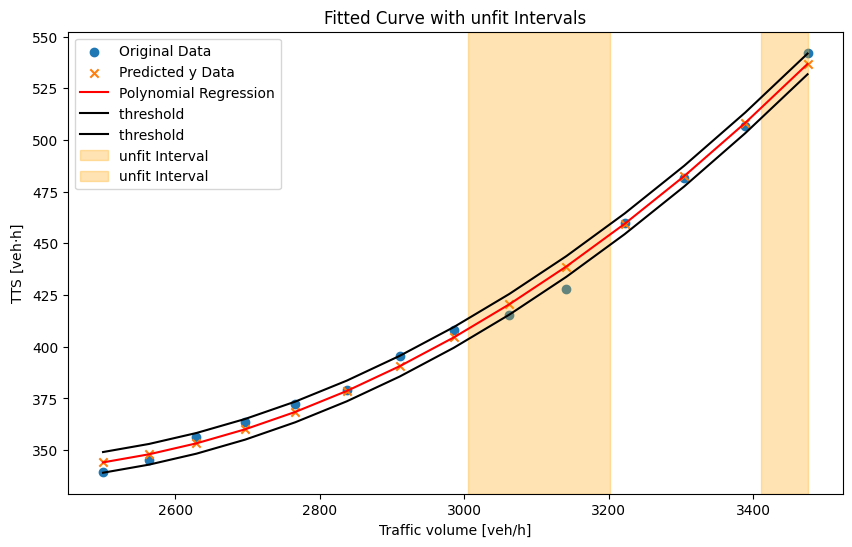

MAIN interval list from VAL: [[3004.6809623430963, 3201.595188284519], [3410.27719665272, 3475.0]]
Modifier...
[MODC]: intervals list:  [[3004.6809623430963, 3201.595188284519], [3410.27719665272, 3475.0]]
[MODC]: (interval_min_tick, interval_max_tick):  (3004.6809623430963, 3201.595188284519)
[MODC]: mod_ticks:  [3050, 3100, 3150, 3200]
[MODC]: mod_x:  [3050.0, 3099.2, 3149.2, 3200.0]
[MODC]: (interval_min_tick, interval_max_tick):  (3410.27719665272, 3475.0)
[MODC]: mod_ticks:  [3450]
[MODC]: mod_x:  [3450]
MAIN mod outcome ([[3050.0, 3099.2, 3149.2, 3200.0], [3450]], [[3004.6809623430963, 3201.595188284519], [3410.27719665272, 3475.0]])
Simulator...
[[3050.0, 3099.2, 3149.2, 3200.0], [3450]]
 IN SIMULATE: [[3050.0, 3099.2, 3149.2, 3200.0], [3450]]
Flatten mod_x [3050.0, 3099.2, 3149.2, 3200.0, 3450]
x list [3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 3050.0, 30

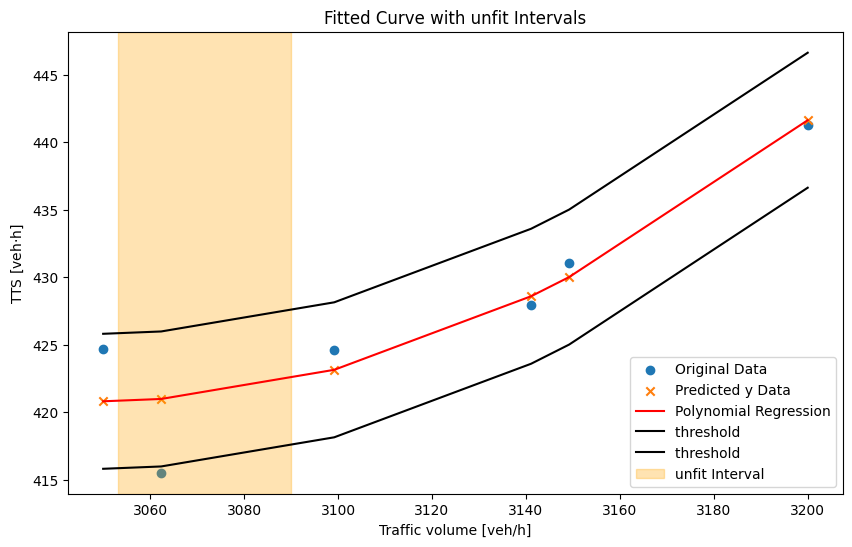

equation,
 y =  0.0009067849020653324x^2  -5.528595632118166x^1 + 8847.655227373507 
unfit_points
 [(3050.0, 424.7083333333334), (3062.3430962343095, 415.51388888888897), (3099.2, 424.6388888888887), (3141.1087866108787, 427.91666666666674), (3149.2, 431.08333333333326), (3200.0, 441.27777777777777)] 
local_unfit_interval
, [[3004.6809623430963, 3053.0857740585775], [3089.985774058577, 3201.595188284519]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


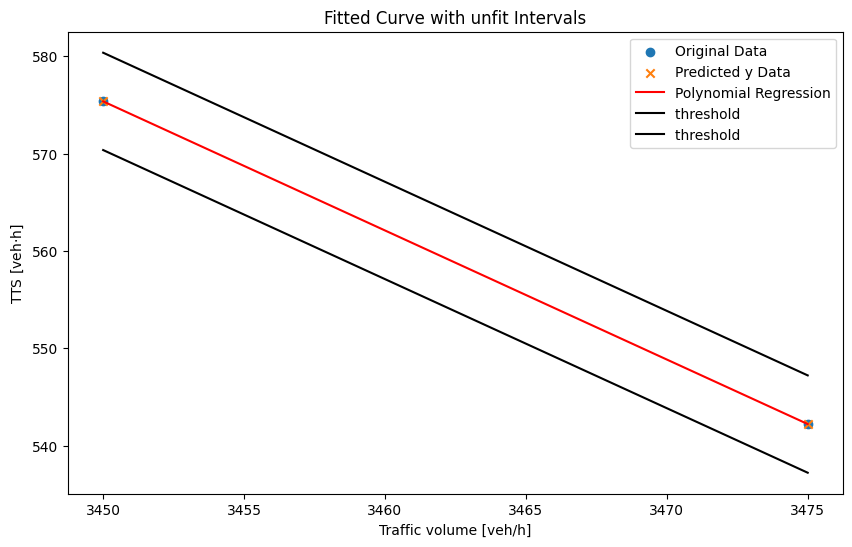

equation,
 y =  -0.00019926153773950915x^2 + 0.05377503773499476x^1 + 2761.5476838698887 
unfit_points
 [(3450.0, 575.361111111111), (3475.0, 542.2083333333336)] 
local_unfit_interval
, [[3410.27719665272, 3475.0]]
DIFFERENCES 
each_interval  [3410.27719665272, 3475.0] 
new_unfit_interval   []
MAIN interval list from VAL: [[3053.0857740585775, 3089.985774058577]]
Modifier...
[MODC]: intervals list:  [[3053.0857740585775, 3089.985774058577]]
[MODC]: (interval_min_tick, interval_max_tick):  (3053.0857740585775, 3089.985774058577)
[MODC]: mod_ticks:  [3075]
[MODC]: mod_x:  [3075]
MAIN mod outcome ([[3075]], [[3053.0857740585775, 3089.985774058577]])
Simulator...
[[3075]]
 IN SIMULATE: [[3075]]
Flatten mod_x [3075]
x list [3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


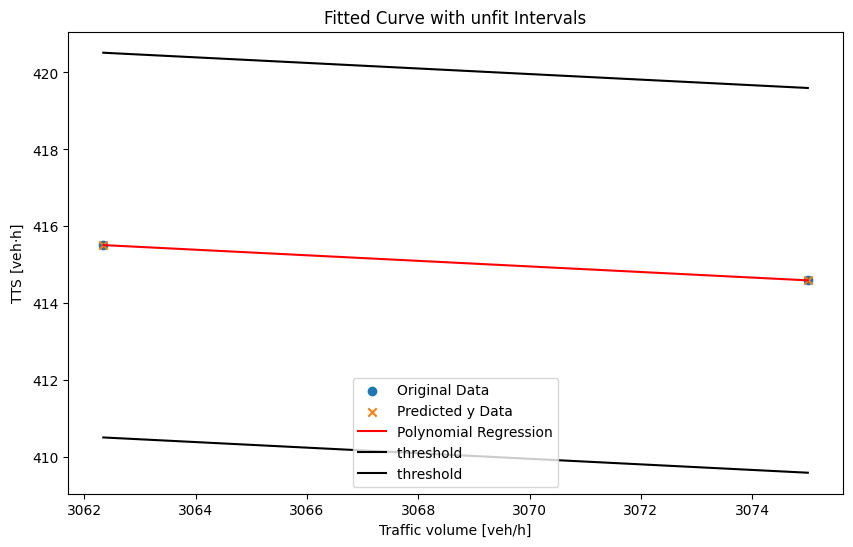

equation,
 y =  -1.914651735449906e-05x^2 + 0.045084503678296896x^1 + 457.00466157159457 
unfit_points
 [(3062.3430962343095, 415.51388888888897), (3075, 414.5972222222222)] 
local_unfit_interval
, [[3053.0857740585775, 3089.985774058577]]
DIFFERENCES 
each_interval  [3053.0857740585775, 3089.985774058577] 
new_unfit_interval   []
MAIN interval list from VAL: []


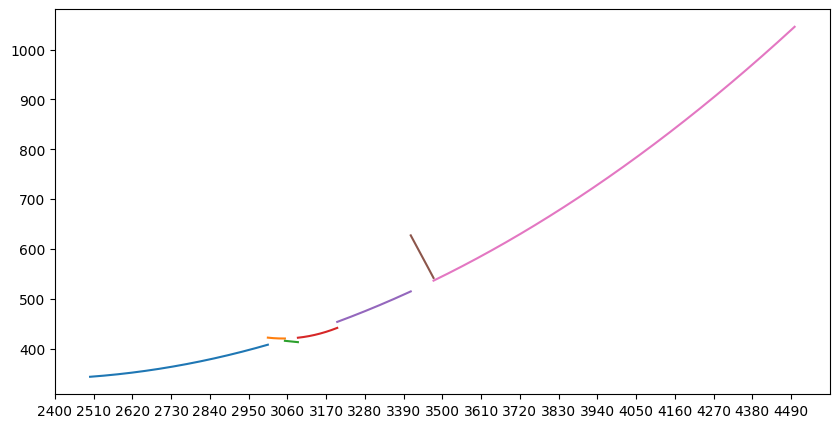

In [2]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

validator_controller = ValidatorController()
logger = Logger()
logger_main_arguments = {}
is_main_func = True
# Initialize interval list for the first iteration
intervals_list=[[2000, 3500]]
#intervals_list=[[2900, 3200]]


while is_main_func:
    
    # Calls Modifier Controller
    mod_outcome = ModifierController.control(intervals_list=intervals_list,selected_modifier=components['modifierA'], do_plot=simexSettings['do_plot'])
    mod_x_list = mod_outcome[0]
    checked_intervals = mod_outcome[1]
    print("MAIN mod outcome", mod_outcome)  

    
    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ['modifier_data_point'] < mdv['modifier_incremental_unit']:
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no generated points'
        logger_main_arguments['remaining_unfit_intervals'] = checked_intervals
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = SimulatorController.simulate(mod_x_list,selected_simulator=components['sumo_simulator_vsl'])
    print(f"MODX {mod_x} and sim_y_list {sim_y_list}")
    assert len(mod_x) == len(sim_y_list)

    print("MAIN modx", mod_x)  

    # Calls Validator controller
    intervals_list =  validator_controller.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[mds["domain_min_interval"], mds["domain_max_interval"]])
    print("MAIN interval list from VAL:", intervals_list)
    
    # Updates interval_list to new range output from validator controller
    # No more unfit intervals -> write MAIN log
    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)

# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

In [ ]:
 mod_ticks = np.arange(mds["domain_min_interval"], mds["domain_max_interval"], mds["modifier_data_point"])


In [ ]:
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

save_object(validator_controller,"vc_vsl-test.pkl")

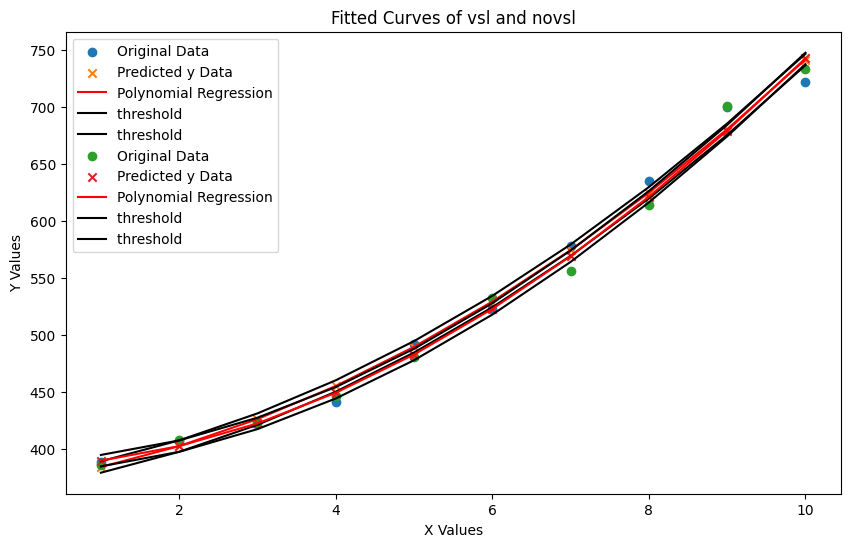

In [12]:
import matplotlib.pyplot as plt
from global_settings import vfs
import pickle

plt.figure(figsize=(10, 6))
#vsl = validator_controller_vsl
#nvsl = validator_controller_novsl

# How to read pickle file from
vsl = pickle.load(open("vc_vsl.pkl", "rb"))
nvsl = pickle.load(open("vc_novsl.pkl", "rb"))

# Plot for vsl
#for controller in [validator_controller_vsl,validator_controller_novsl]:
# controller= validator_controller_novsl
#    print(f"X values and Y values {controller.x_values}{controller.y_values} predicted values {controller.predicted_values}")
#    plt.scatter(controller.x_values, controller.y_values, label=f'Original Data ')
#    plt.scatter(controller.x_values, controller.predicted_values, label=f'Predicted y Data ', marker='x')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1], color='red', label=f'Polynomial Regression')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(vsl.x_values, vsl.y_values, label=f'Original Data ')
plt.scatter(vsl.x_values, vsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1], color='red', label=f'Polynomial Regression')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(nvsl.x_values, nvsl.y_values, label=f'Original Data ')
plt.scatter(nvsl.x_values, nvsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1], color='red', label=f'Polynomial Regression')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Fitted Curves of vsl and novsl')
plt.legend()
plt.show()

In [1]:
from components_configuration import components
from modifier_controller import ModifierController
from global_settings import simexSettings,mds

# Initialize interval list for the first iteration
intervals_list=[[mds['domain_min_interval'], mds['domain_max_interval']]]

mod_outcome = ModifierController.control(intervals_list=intervals_list,selected_modifier=components['modifier'], do_plot=simexSettings['do_plot'])
mod_x_list = mod_outcome[0]
checked_intervals = mod_outcome[1]
print("MAIN mod outcome", mod_outcome)

# Static tick does not work?

Modifier...
[MODC]: intervals list:  [[2500, 5000]]
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 5000)
[MODC]: mod_ticks:  [2510, 2520, 2530, 2540, 2550, 2560, 2570, 2580, 2590, 2600, 2610, 2620, 2630, 2640, 2650, 2660, 2670, 2680, 2690, 2700, 2710, 2720, 2730, 2740, 2750, 2760, 2770, 2780, 2790, 2800, 2810, 2820, 2830, 2840, 2850, 2860, 2870, 2880, 2890, 2900, 2910, 2920, 2930, 2940, 2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040, 3050, 3060, 3070, 3080, 3090, 3100, 3110, 3120, 3130, 3140, 3150, 3160, 3170, 3180, 3190, 3200, 3210, 3220, 3230, 3240, 3250, 3260, 3270, 3280, 3290, 3300, 3310, 3320, 3330, 3340, 3350, 3360, 3370, 3380, 3390, 3400, 3410, 3420, 3430, 3440, 3450, 3460, 3470, 3480, 3490, 3500, 3510, 3520, 3530, 3540, 3550, 3560, 3570, 3580, 3590, 3600, 3610, 3620, 3630, 3640, 3650, 3660, 3670, 3680, 3690, 3700, 3710, 3720, 3730, 3740, 3750, 3760, 3770, 3780, 3790, 3800, 3810, 3820, 3830, 3840, 3850, 3860, 3870, 3880, 3890, 3900, 3910, 3920, 3930, 3940, 3